In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import csth.utils.photopeak_fit as pk

from scipy import optimize

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

In [3]:
run1 = 6484
run2 = 6803

directory = '../../DATA/'
filename1 = f'cepks_{run1}_0000_11999_6q0min.h5'
filename2 = f'cepks_{run2}_0000_15055_6q0min.h5'

data1 = pd.HDFStore(directory + filename1)['/esum']
data2 = pd.HDFStore(directory + filename2)['/esum']

# data1['time']=data1['time']*10**-10
# data2['time']=data2['time']*10**-10

In [4]:
data1.keys()

Index(['event', 'peak', 'location', 'nslices', 'nhits', 'noqslices', 'time',
       's1e', 't0', 'rmax', 'rsize', 'zmax', 'zsize', 'x0', 'y0', 'z0', 'e0',
       'q0', 'e0h', 'q0h', 'x', 'y', 'z', 'q', 'e', 'eh', 'qh', 'xu', 'yu',
       'zu', 'e0f', 'e0b', 'ef', 'eb', 'e1', 'x1', 'y1', 'z1', 'e2', 'x2',
       'y2', 'z2', 'eblob1', 'eblob2', 'd12'],
      dtype='object')

In [5]:
N = len(data1)
T = data1['time'].values[-1]-data1['time'].values[0]
rate1 = N/T

print(f'Run: {run1}')
print(f'Number of events:', N)
print(f'Duration:', T)
print(f'Rate (Hz):', rate1)

Run: 6484
Number of events: 528351
Duration: 87864983
Rate (Hz): 0.006013214615884009


In [6]:
N = len(data2)
T = data2['time'].values[-1]-data2['time'].values[0]
rate2 = N/T

print(f'Run: {run2}')
print(f'Number of events:', N)
print(f'Duration:', T)
print(f'Rate (Hz):', rate2)

Run: 6803
Number of events: 299465
Duration: 122411925
Rate (Hz): 0.002446371135818671


In [7]:
def histo_1d_rate(var, rg= None, nbins=100, scale=None):
    '''
    Arguments:
    
    var = string with the variable to be histogramed
    rg  = range of the histogram
    nbins = number of bins of the histogram
    scale = scale of the y axis
    
    '''
    
    if rg is None: rg =(data1[var].min(), data1[var].max())
    
    H1, edg = np.histogram(data1[var], range=rg, bins=nbins)
    H2, _   = np.histogram(data2[var], range=rg, bins=nbins)
    x = [(edg[i+1]+edg[i])/2. for i in range(0, len(edg)-1)]
    
    T1 = data1['time'].values[-1]-data1['time'].values[0]
    T2 = data2['time'].values[-1]-data2['time'].values[0]
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.step(x, H1/T1, where='mid', label=f'{run1}', c='blue')
    ax.step(x, H2/T2, where='mid', label=f'{run2}', c='red')
    
    
    ax.set_xlabel(f'{var}')
    ax.set_ylabel('Rate (Hz)')
    ax.legend()
    
    if scale is not None: ax.set_yscale(scale)
        
        
        
def histo_1d(var, rg= None, nbins=100, scale=None):
    '''
    Arguments:
    
    var = string with the variable to be histogramed
    rg  = range of the histogram
    nbins = number of bins of the histogram
    scale = scale of the y axis
    
    '''
    
    if rg is None: rg =(data1[var].min(), data1[var].max())
    
    H1, edg = np.histogram(data1[var], range=rg, bins=nbins)
    H2, _   = np.histogram(data2[var], range=rg, bins=nbins)
    x = [(edg[i+1]+edg[i])/2. for i in range(0, len(edg)-1)]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.step(x, H1, where='mid', label=f'{run1}', c='blue')
    ax.step(x, H2, where='mid', label=f'{run2}', c='red')
    
    
    ax.set_xlabel(f'{var}')
    ax.set_ylabel('Entries')
    ax.legend()
    
    if scale is not None: ax.set_yscale(scale)

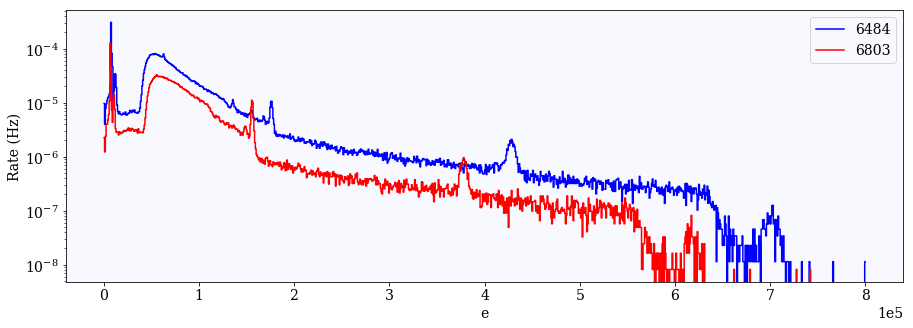

In [8]:
histo_1d_rate('e', rg = (0, 8e5), nbins=1000, scale='log')

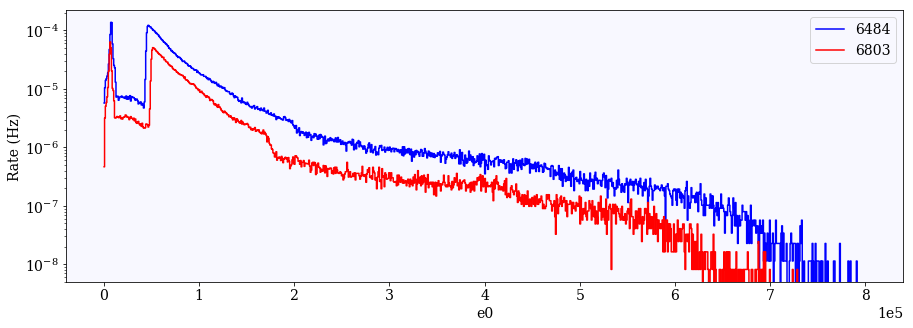

In [9]:
histo_1d_rate('e0', rg = (0, 8e5), nbins=1000, scale='log')

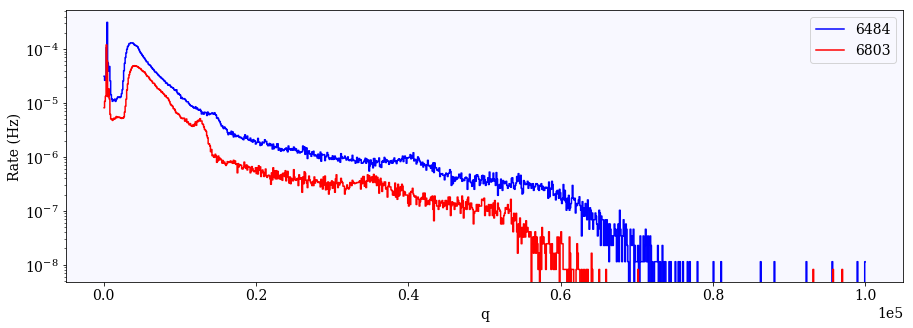

In [10]:
histo_1d_rate('q', rg = (0, 1e5), nbins=1000, scale='log')

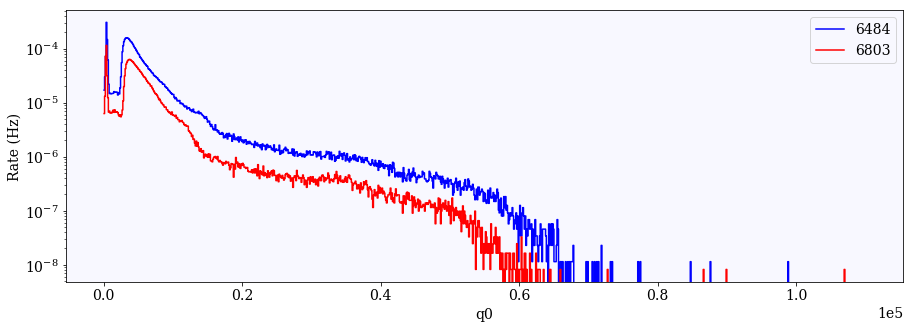

In [11]:
histo_1d_rate('q0', rg = (0, 1.1e5), nbins=1000, scale='log')

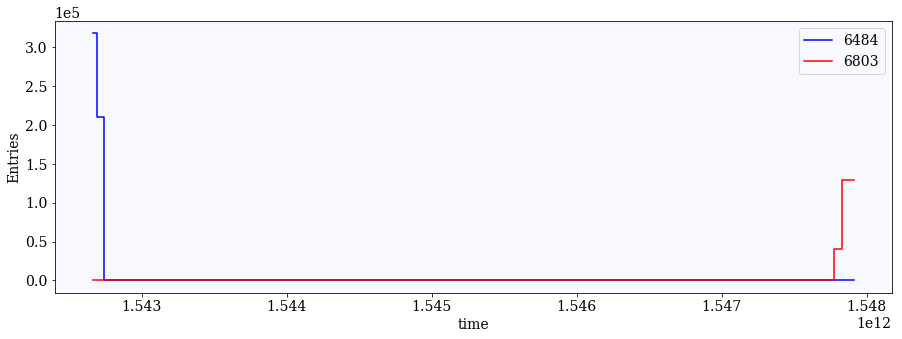

In [12]:
histo_1d('time', rg = (data1.time.min(), data2.time.max()))

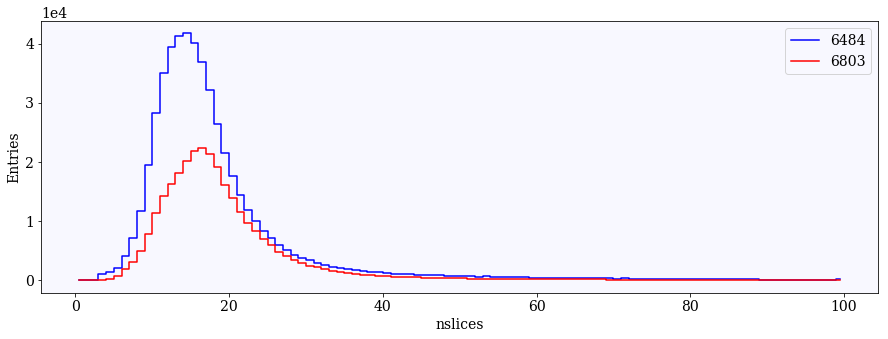

In [13]:
histo_1d('nslices', rg=(0, 100))

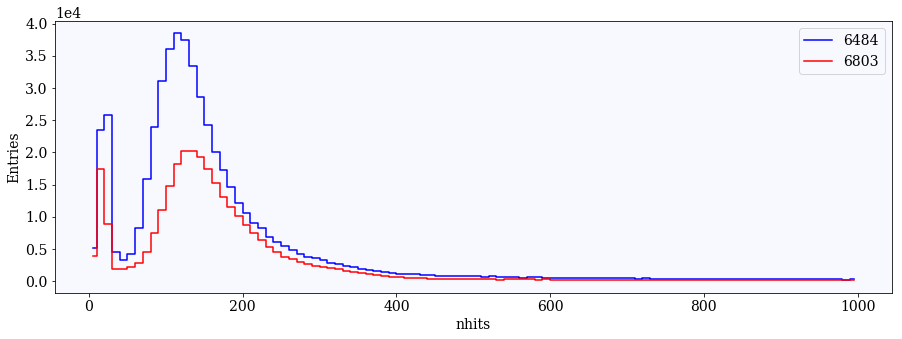

In [14]:
histo_1d('nhits', rg=(0, 1000))

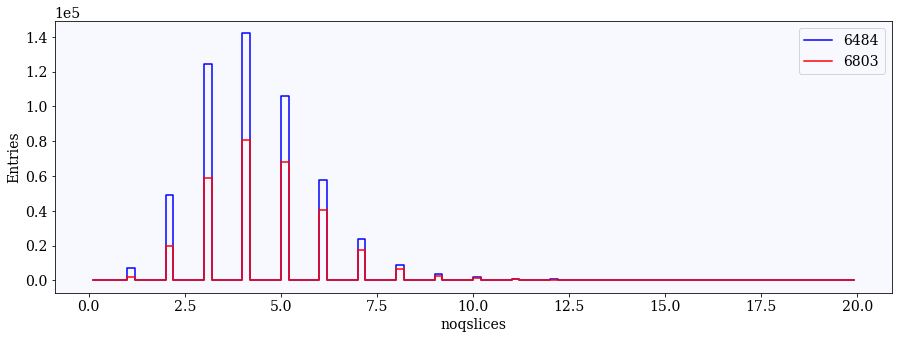

In [15]:
histo_1d('noqslices', rg=(0, 20))

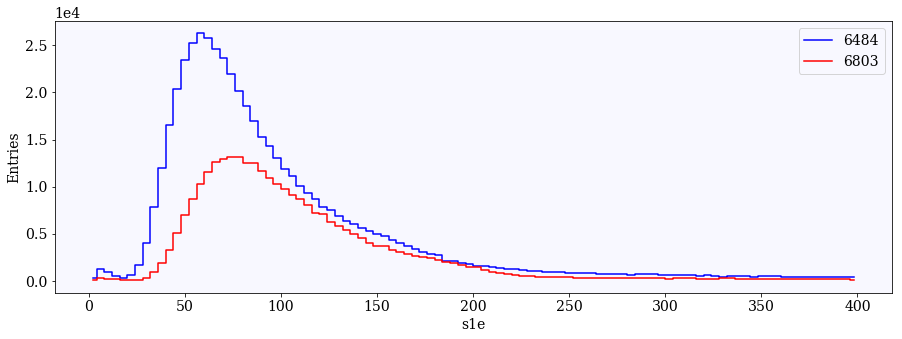

In [16]:
histo_1d('s1e', rg=(0, 400))

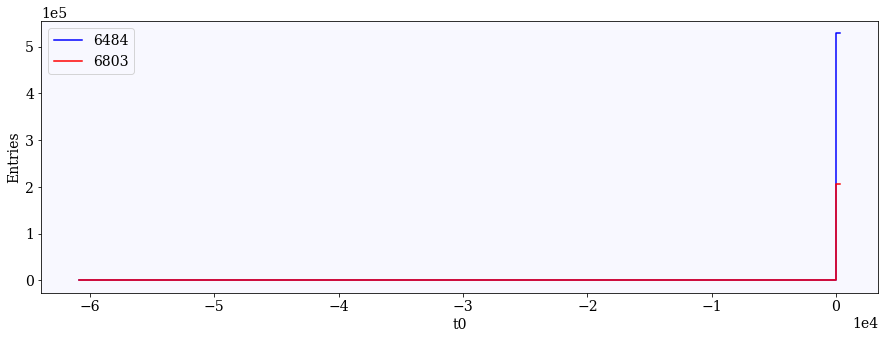

In [17]:
histo_1d('t0')

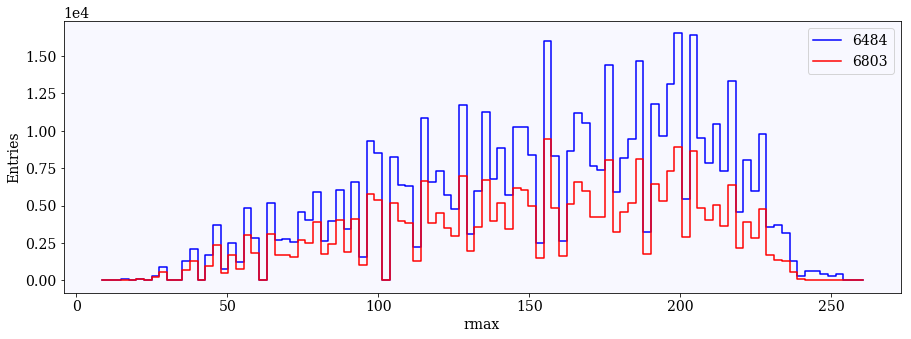

In [18]:
histo_1d('rmax')

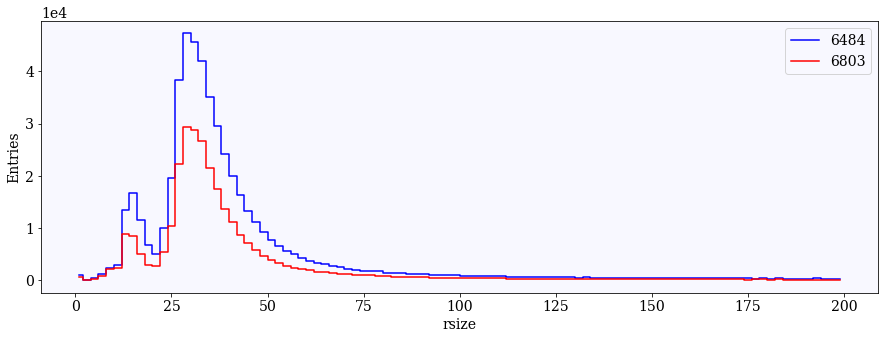

In [19]:
histo_1d('rsize', rg=(0, 200))

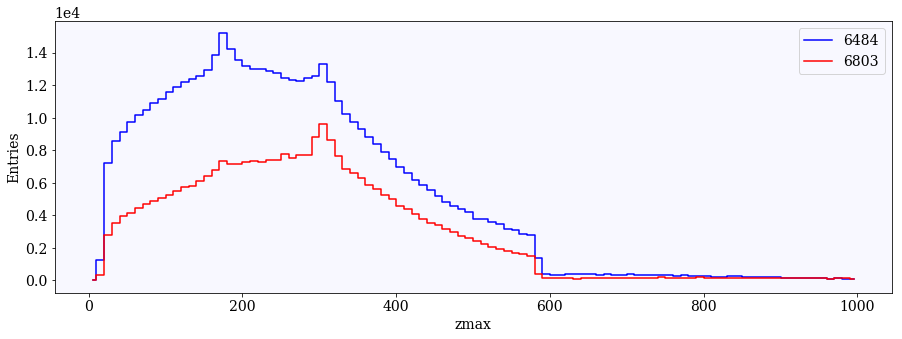

In [20]:
histo_1d('zmax', rg=(0, 1e3))

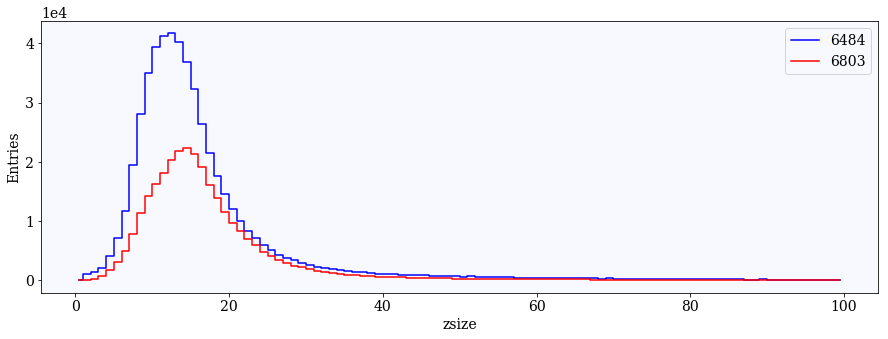

In [21]:
histo_1d('zsize', rg=(0, 100))

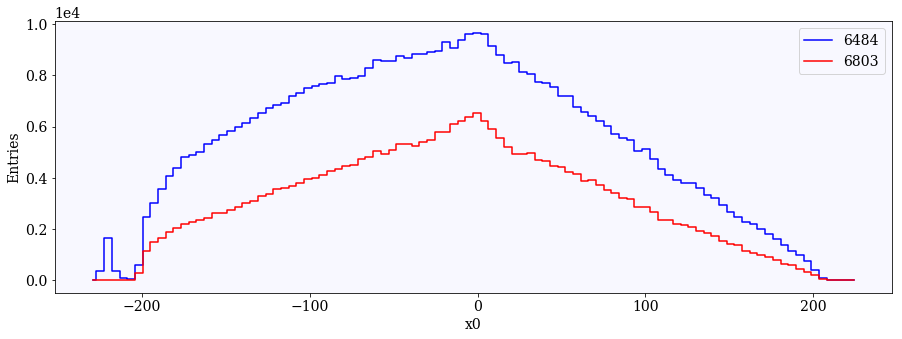

In [22]:
histo_1d('x0')

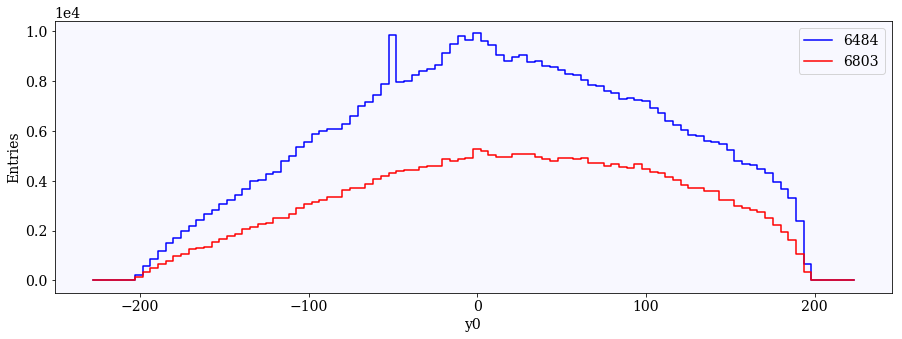

In [23]:
histo_1d('y0')

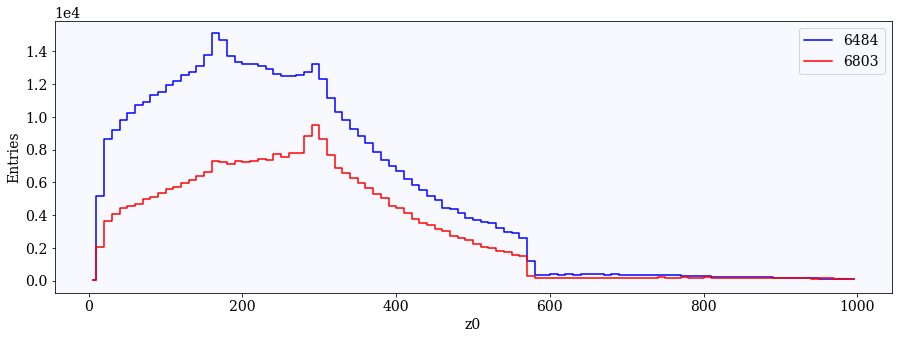

In [24]:
histo_1d('z0', rg=(0, 1e3))